# Experiment 1 - Network growth

### Read the data from csv

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the csv
df = pd.read_csv("data/exp1_network_growth_data500.csv")

print("Experiment data analysis - Network growth")
print("Number of samples:", df["n_sample"].max())
print("Number of RDDs by sample:", df["n_network"].max())
print("Range of RDDs:", df["n_rdds"].min(),"-", df["n_rdds"].max())

df.head(20)

Experiment data analysis - Network growth
Number of samples: 500
Number of RDDs by sample: 8
Range of RDDs: 3 - 10


,n_sample,n_network,n_rdds,n_rdda_attractors,t_find_attractors_method,n_pair_attractors,t_comp_paris_method,n_attractor_fields,t_optimized_method
0,1,1,3,29,1.428841,242,0.078654,6,0.037363
1,1,2,4,27,0.569466,170,0.042919,4,0.022636
2,1,3,5,33,1.312037,209,0.063791,9,0.064721
3,1,4,6,82,1.724923,904,0.212845,438,30.575644
4,1,5,7,68,1.613925,676,0.165403,172,3.318155
5,1,6,8,93,1.859784,836,0.238347,172,27.215594
6,1,7,9,81,1.812516,567,0.147042,0,0.006125
7,1,8,10,118,2.651089,1035,0.269565,2200,1864.570178
8,2,1,3,26,0.659893,183,0.047000,3,0.018296
9,2,2,4,51,1.085745,687,0.135254,77,0.511187


In [19]:
# Time of Experiment (in seg) 437589.64926457405
# Time of Experiment (in hours, minutes and seconds) 01:33:09
import time

time_experiment = df[['t_find_attractors_method','t_optimized_method','t_comp_paris_method']].sum().sum()
time_format = time.strftime("%H:%M:%S", time.gmtime(time_experiment))
print("Time experiment (seg.):",time_experiment)
print("Time experiment (hh:mm:ss):",time_format)

Time experiment (seg.): 359572.5085618496
Time experiment (hh:mm:ss): 03:52:52


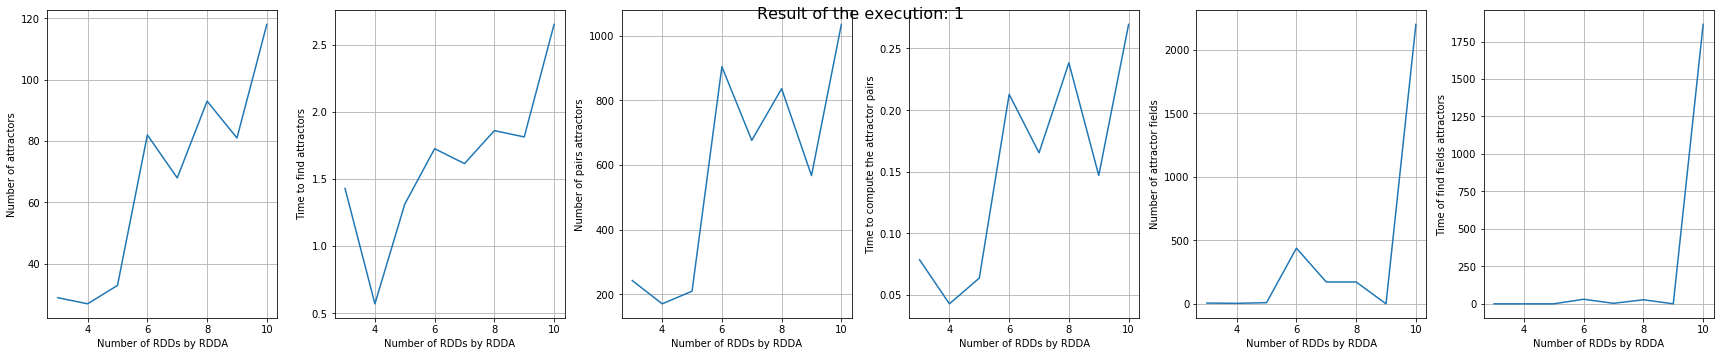

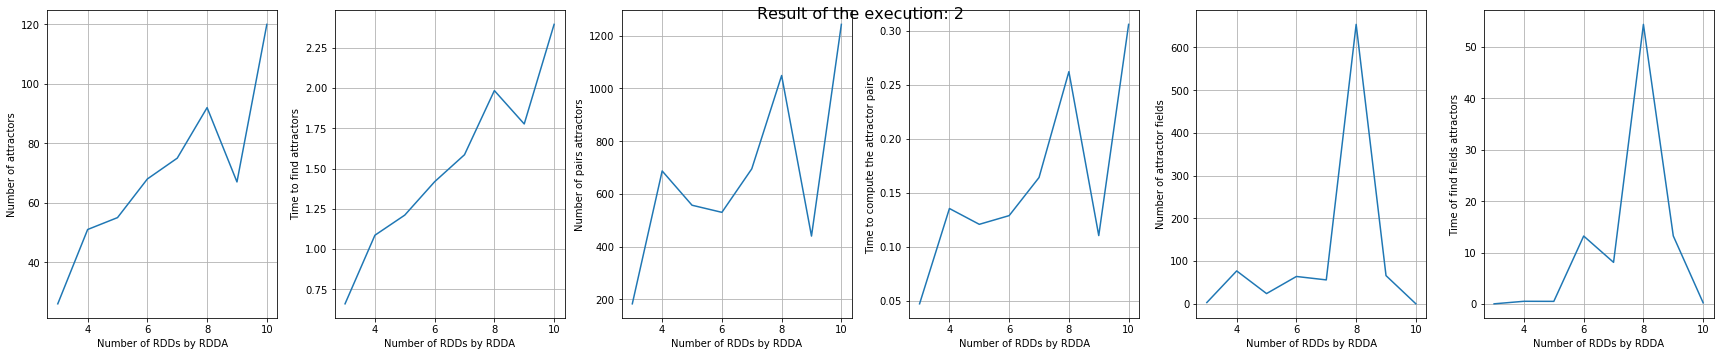

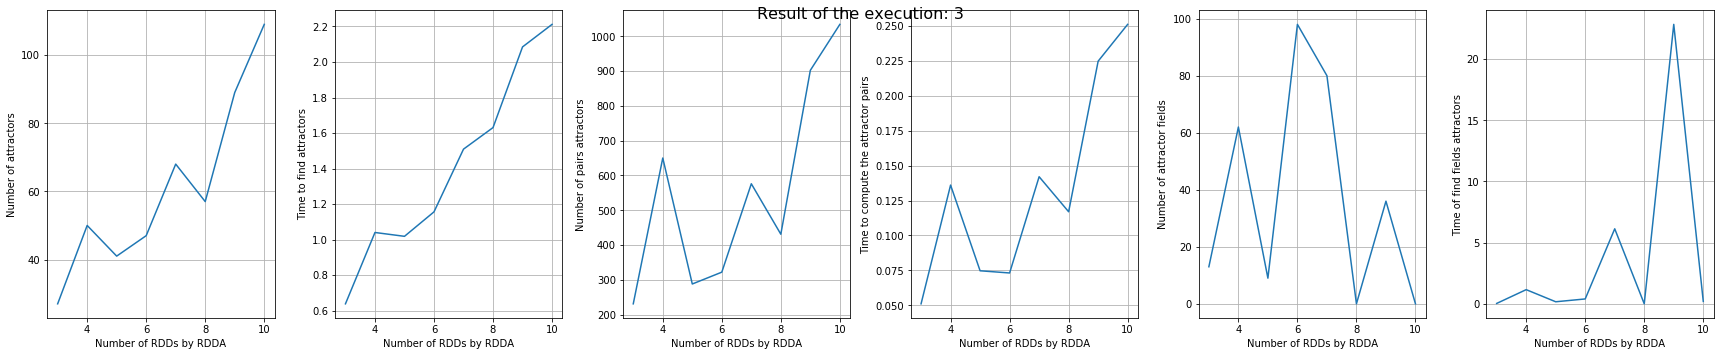

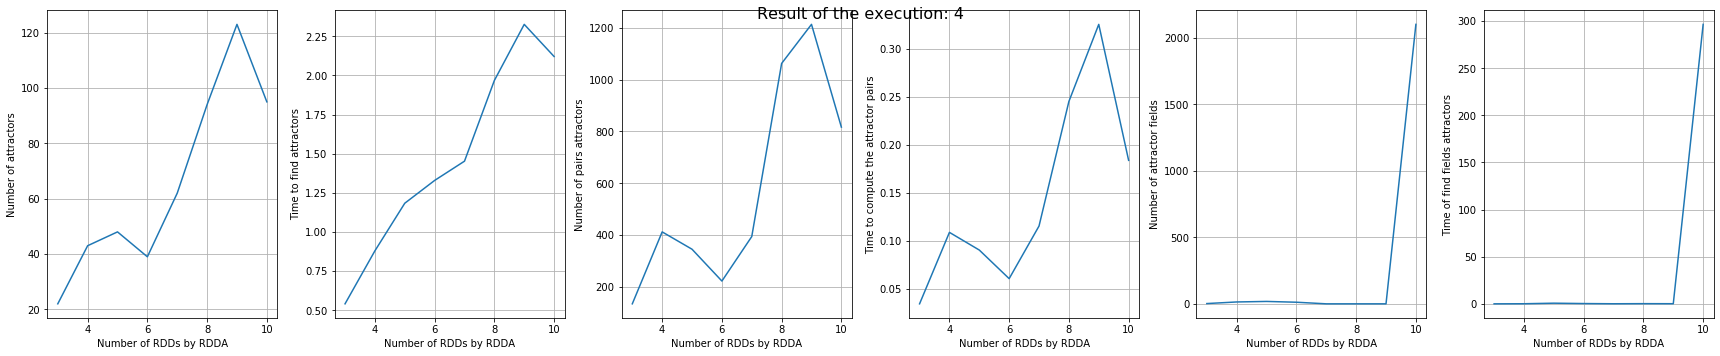

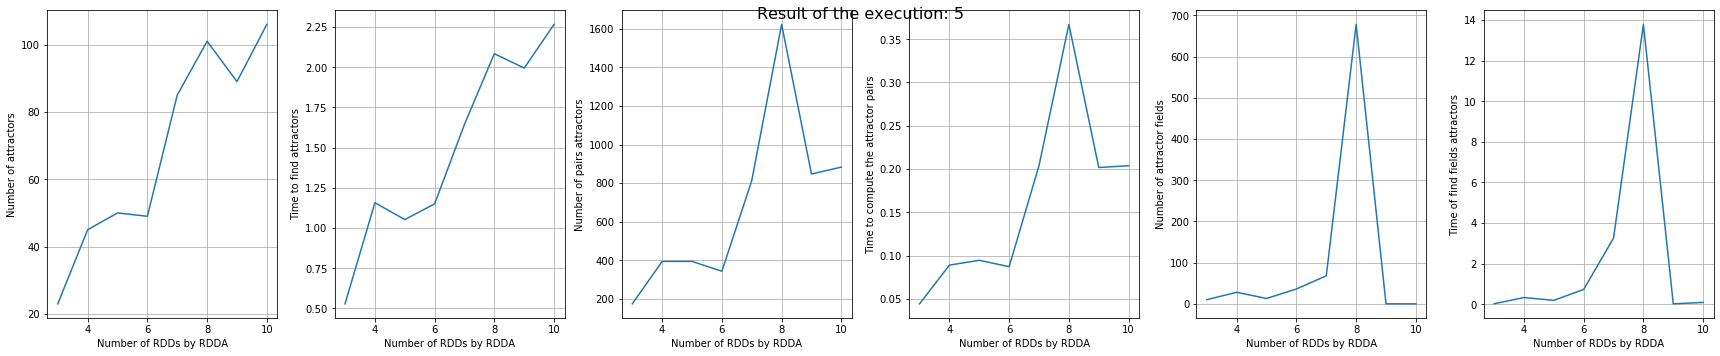

In [20]:
l_labels_y = ["Number of attractors", "Time to find attractors", "Number of pairs attractors", "Time to compute the attractor pairs", "Number of attractor fields", "Time of find fields attractors"]

grouped = df.groupby("n_sample")
labels = {key:label for key, label in zip(df.keys()[3:], [
          "Number of attractors",
          "Time to find attractors",
          "Number of pairs attractors",
          "Time to compute the attractor pairs",
          "Number of attractor fields",
          "Time of find fields attractors"])}

for number in np.array(list(grouped.groups.keys()))[:5]:
    group = grouped.get_group(number)
    fig_, axs = plt.subplots(1,6,figsize=(24,5))
    for (ax, key) in zip(axs, group.keys()[3:]):
        ax.plot(group['n_rdds'], group[key])
        ax.set_xlabel('Number of RDDs by RDDA')
        ax.set_ylabel(labels[key])
        ax.grid(True)
    fig_.suptitle('Result of the execution: ' + str(number), fontsize=16)
    fig_.tight_layout()

### Boxplot for every indicator - General vision

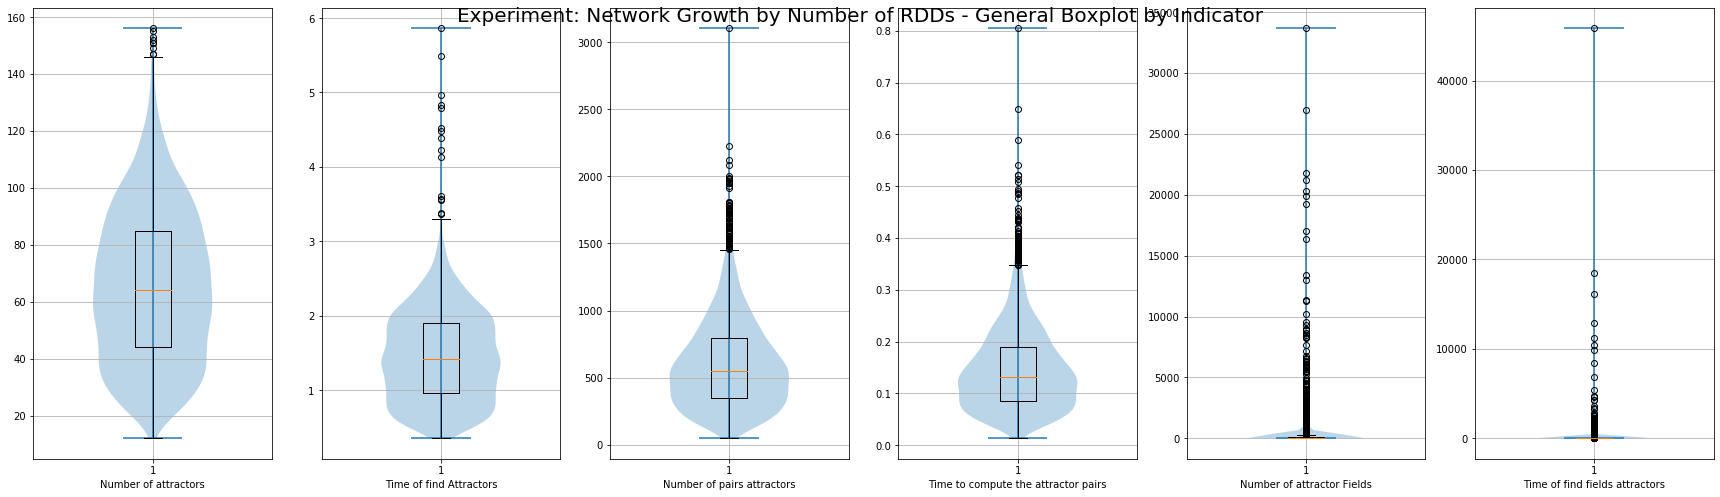

In [21]:
# General Boxplot by Indicator
l_labels_y = ["Number of attractors", "Time of find Attractors", "Number of pairs attractors", "Time to compute the attractor pairs", "Number of attractor Fields", "Time of find fields attractors"]

fig_, axs = plt.subplots(1,6,figsize=(24,7))
cont_label = 0
for (key,ax) in zip(df.keys()[3:], axs):
    ax.boxplot(df[key])
    ax.violinplot(df[key])
    ax.set_xlabel(l_labels_y[cont_label])
    ax.grid(True)
    cont_label += 1
fig_.suptitle('Experiment: Network Growth by Number of RDDs - General Boxplot by Indicator', fontsize=20)
fig_.tight_layout()

### Boxplot for every Indicator - Indicator across all the samples for every number of RDDs

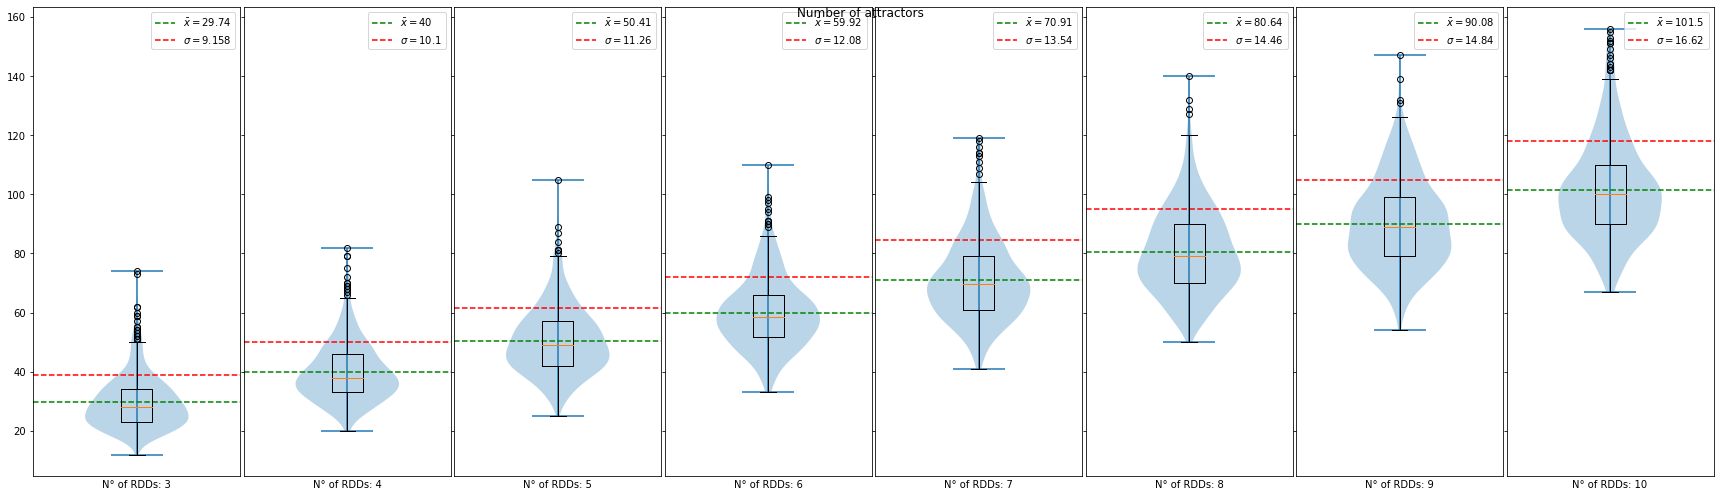

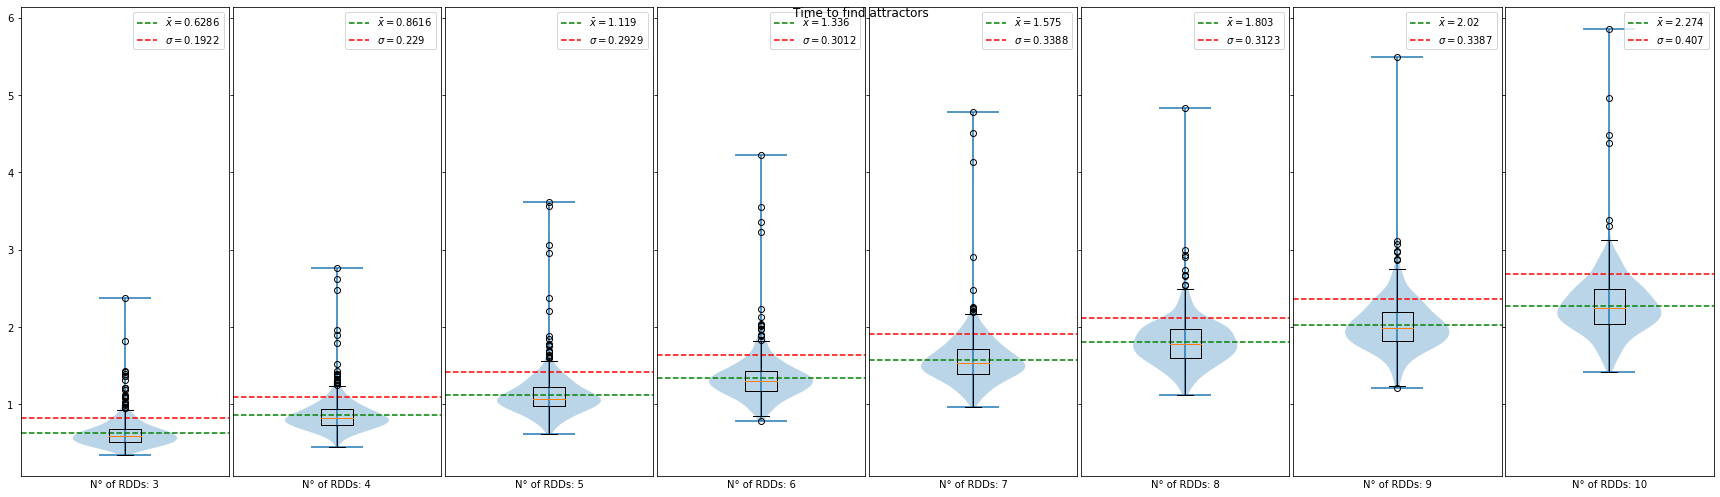

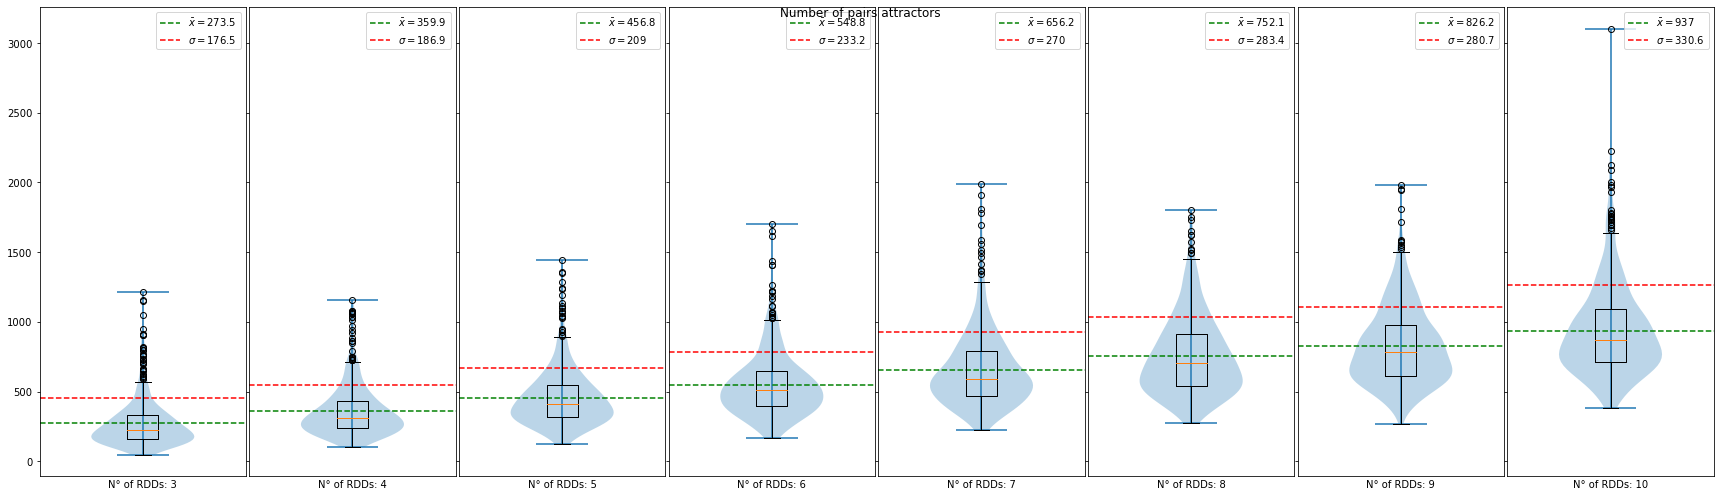

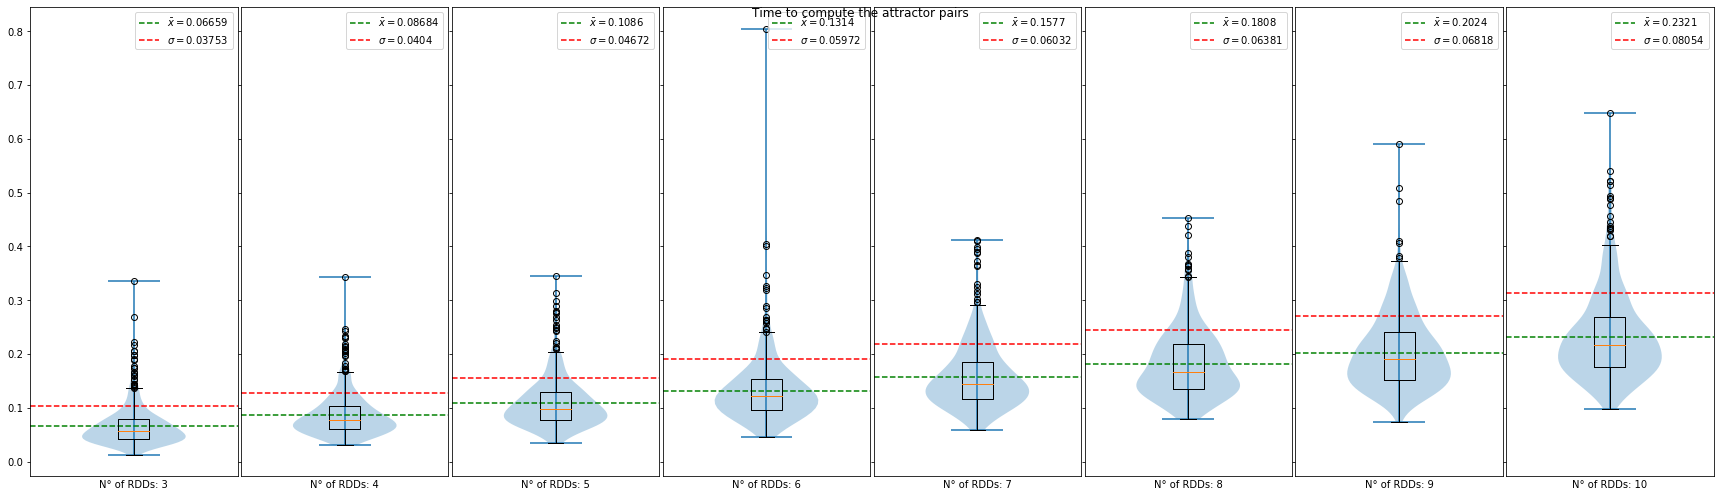

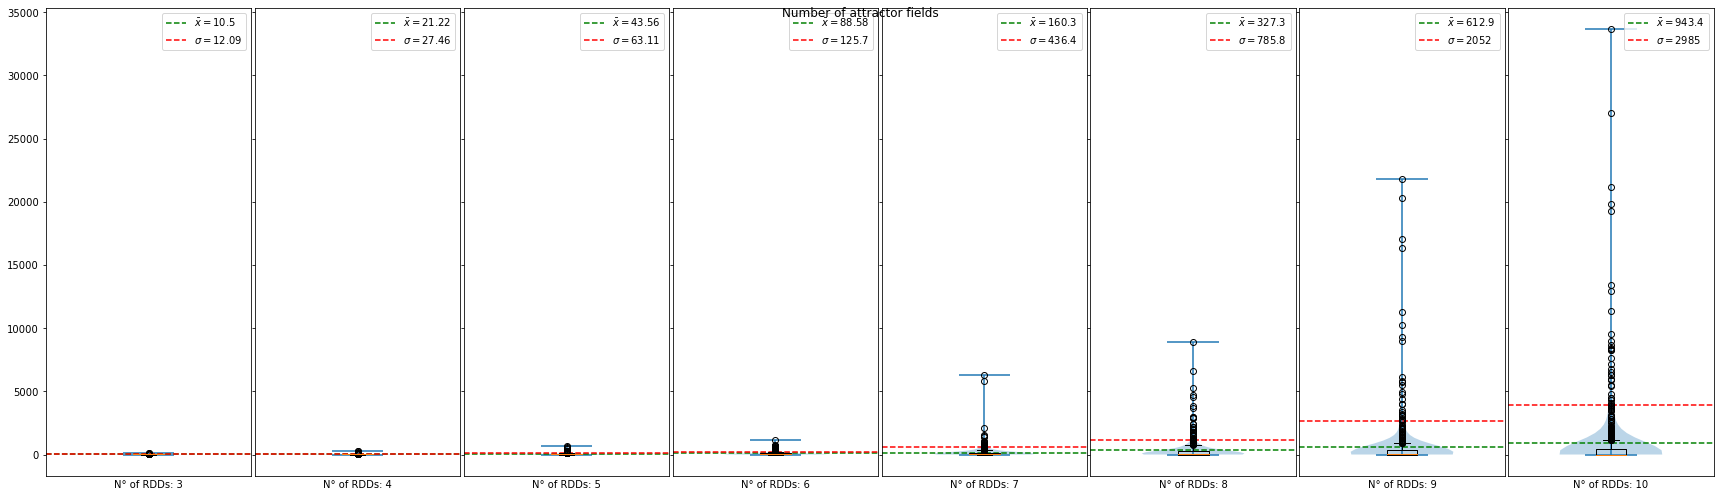

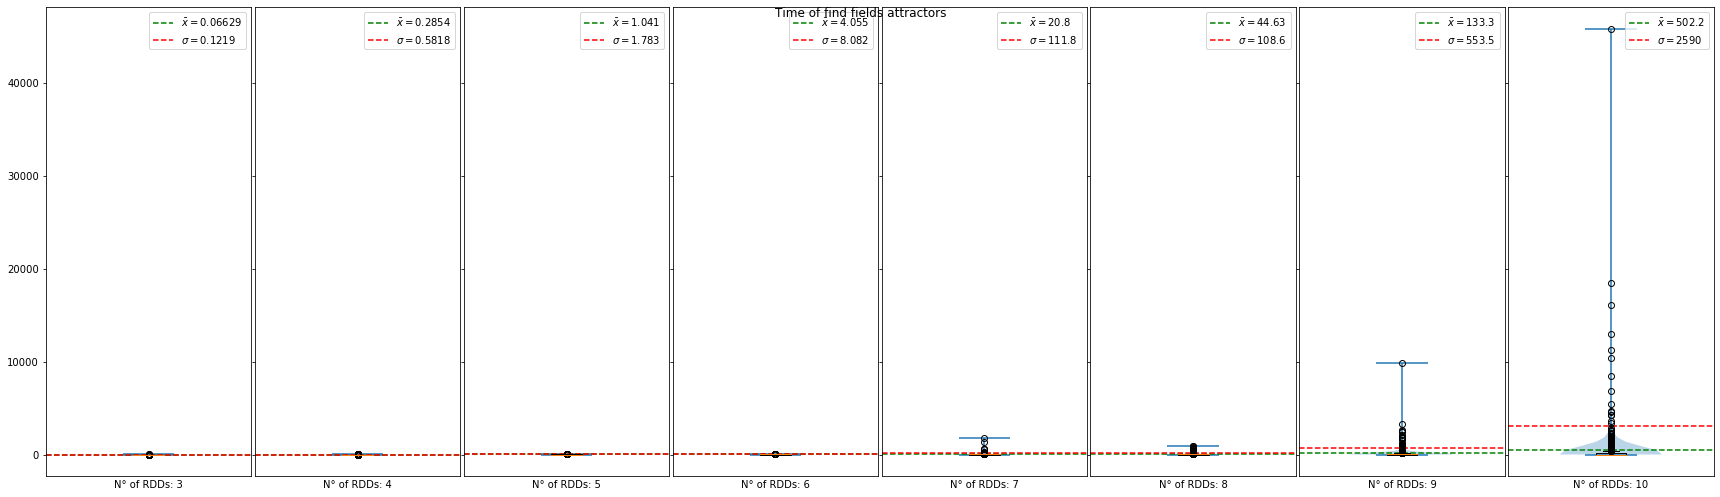

In [22]:
n_rdds = df['n_rdds'].unique()
labels = {key:label for key, label in zip(df.keys()[3:], [
          "Number of attractors",
          "Time to find attractors",
          "Number of pairs attractors",
          "Time to compute the attractor pairs",
          "Number of attractor fields",
          "Time of find fields attractors"])}
log_scale = {key:label for key, label in zip(df.keys()[3:], [
          False,
          False,
          True,
          True,
          True,
          True])}
grouped = df.groupby("n_rdds")

for key in df.keys()[3:]:
    fig, axs = plt.subplots(1, n_rdds.size, figsize=(n_rdds.size*3,7), sharey=True)
    for ax, n_rdd in zip(axs, n_rdds):
        group = grouped.get_group(n_rdd)
        data = group[key]
        mean = ax.axhline(y=data.mean(), xmin=0.0, xmax=1.0, color='g',ls='--',label=fr'$\bar{{x}}={data.mean():.4g}$')
        #std_min = ax.axhline(y=data.mean()-data.std(), xmin=0.0, xmax=1.0, color='r',ls='--')
        std_max = ax.axhline(y=data.mean()+data.std(), xmin=0.0, xmax=1.0, color='r',ls='--',label=fr'$\sigma={data.std():.4g}$')
        ax.legend()
        # if log_scale[key]:
        #     ax.set_yscale('symlog')
        ax.boxplot(data)
        ax.violinplot(data)
        ax.set_xlabel(f'N° of RDDs: {n_rdd}')
        ax.set_xticks([])
        ax.set_xlim((0.5,1.5))
    fig.suptitle(labels[key])
    fig.tight_layout(w_pad=0)

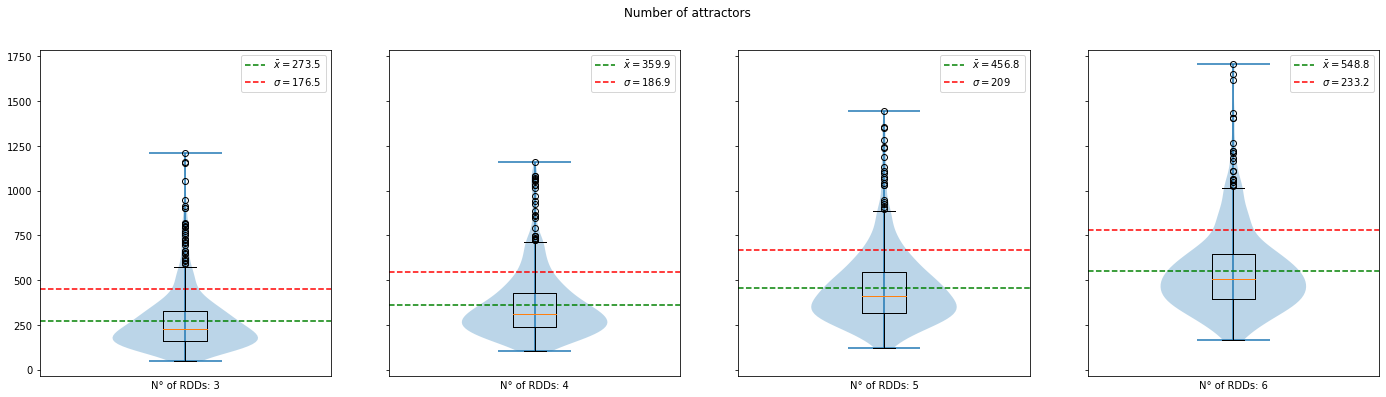

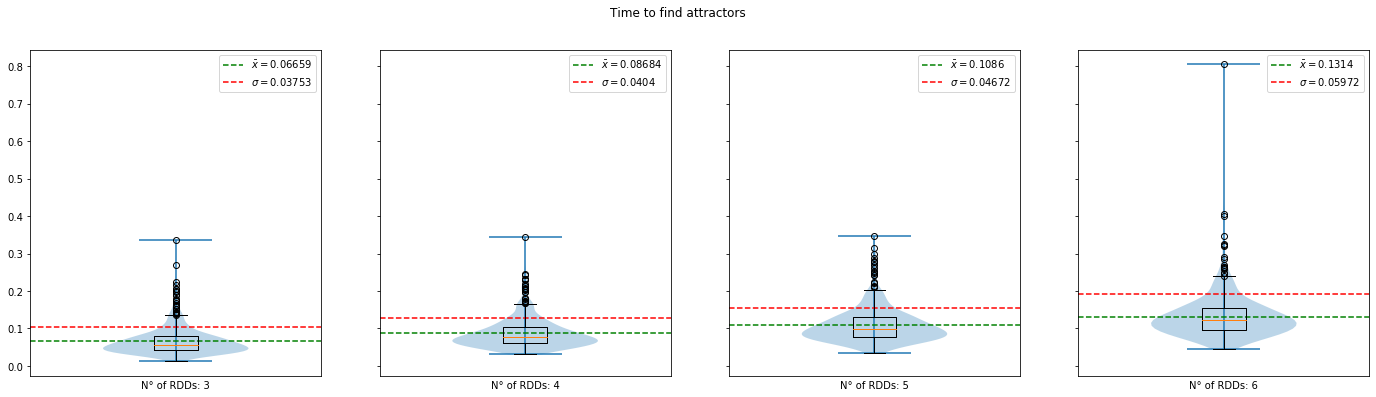

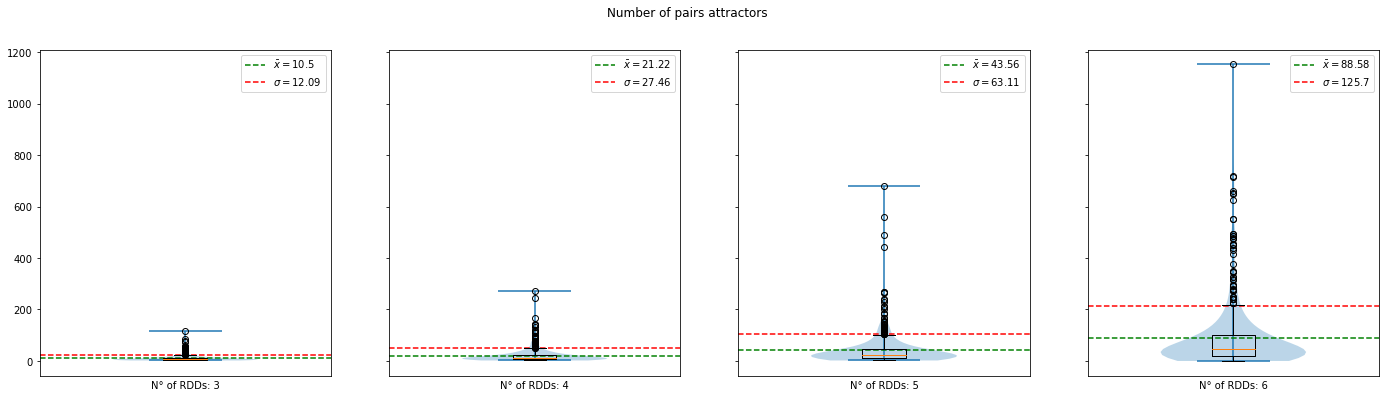

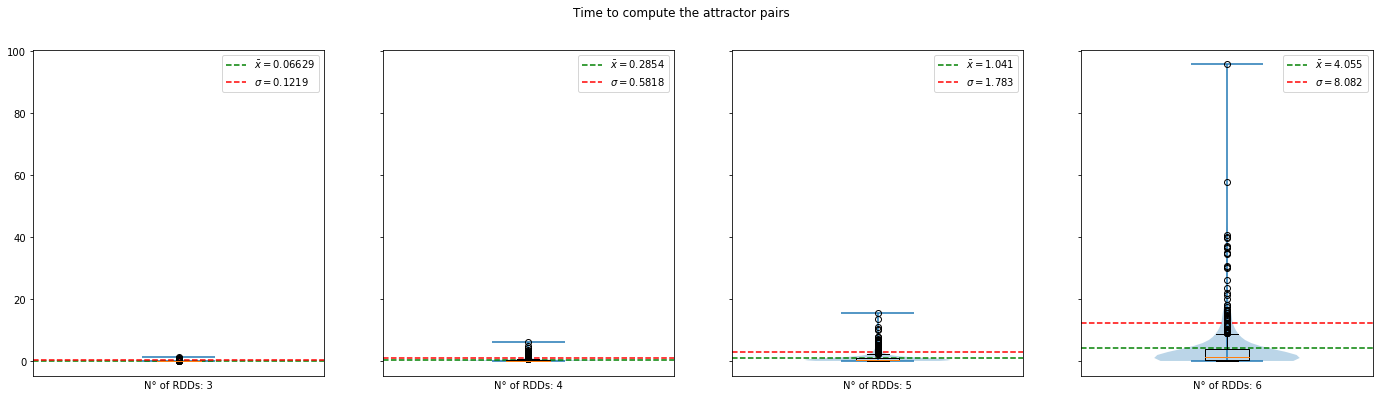

In [35]:
n_rdds = df['n_rdds'].unique()
labels = {key:label for key, label in zip(df.keys()[5:], [
          "Number of attractors",
          "Time to find attractors",
          "Number of pairs attractors",
          "Time to compute the attractor pairs",
          "Number of attractor fields",
          "Time of find fields attractors"])}
log_scale = {key:label for key, label in zip(df.keys()[5:], [
          False,
          False,
          True,
          True,
          True,
          True])}
grouped = df.groupby("n_rdds")

for key in df.keys()[5:]:
    fig, axs = plt.subplots(1, n_rdds.size//2, figsize=(n_rdds.size*3,6), sharey=True)
    for ax, n_rdd in zip(axs, n_rdds):
        group = grouped.get_group(n_rdd)
        data = group[key]
        mean = ax.axhline(y=data.mean(), xmin=0.0, xmax=1.0, color='g',ls='--',label=fr'$\bar{{x}}={data.mean():.4g}$')
        #std_min = ax.axhline(y=data.mean()-data.std(), xmin=0.0, xmax=1.0, color='r',ls='--')
        std_max = ax.axhline(y=data.mean()+data.std(), xmin=0.0, xmax=1.0, color='r',ls='--',label=fr'$\sigma={data.std():.4g}$')
        ax.legend()
        #if log_scale[key]:
        #ax.set_yscale('symlog')
        ax.boxplot(data)
        ax.violinplot(data)
        ax.set_xlabel(f'N° of RDDs: {n_rdd}')
        ax.set_xticks([])
        ax.set_xlim((0.5,1.5))
    fig.suptitle(labels[key])
    # fig.tight_layout(w_pad=0)

### Pandas Dataframe to Latex

In [ ]:
df.keys()

In [ ]:
df_output = df[['t_find_attractors_method','n_rdda_attractors','n_pair_attractors', 't_comp_paris_method',
       'n_attractor_fields', 't_optimized_method']].mean()
df_output


In [ ]:
print(df_output.to_latex(index=False))